In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load the dataset
train_data = pd.read_csv('/content/Train.csv')
test_data = pd.read_csv('/content/Test.csv')


In [ ]:
train_data.head()


,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


In [ ]:
test_data.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success


In [ ]:
#check the shape
print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)

Training Data Shape: (31647, 18)
Testing Data Shape: (13564, 17)


In [ ]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

Handling Missing Values

In [ ]:
# Combine the training and testing data
combined_data = pd.concat([train_data, test_data], ignore_index=True)

print("\nMissing Values in Combined Data:")
print(combined_data.isnull().sum())


Missing Values in Combined Data:
id                                      0
customer_age                          889
job_type                                0
marital                               231
education                               0
default                                 0
balance                               580
housing_loan                            0
personal_loan                         223
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 433
num_contacts_in_campaign              157
days_since_prev_campaign_contact    36954
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed             13564
dtype: int64


In [ ]:
# Check for missing values
print(train_data.isnull().sum())


id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64


In [ ]:
# Select only numerical columns for median imputation
numerical_cols = train_data.select_dtypes(include=['number']).columns
train_data[numerical_cols] = train_data[numerical_cols].fillna(train_data[numerical_cols].median())


In [ ]:
# Fill missing categorical values with the mode
for col in train_data.select_dtypes(include=['object']).columns:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)

# Check for missing values after handling
print(train_data.isnull().sum())

id                                  0
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
term_deposit_subscribed             0
dtype: int64


In [ ]:
# Encode categorical variables using one-hot encoding
train_data = pd.get_dummies(train_data, columns=['job_type', 'marital', 'education', 'default',
                                                 'housing_loan', 'personal_loan', 'communication_type',
                                                 'month', 'prev_campaign_outcome'], drop_first=True)

In [ ]:
# Select only numerical columns for median imputation
numerical_cols = test_data.select_dtypes(include=['number']).columns
test_data[numerical_cols] = test_data[numerical_cols].fillna(test_data[numerical_cols].median())

for col in test_data.select_dtypes(include=['object']).columns:
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)
test_data = pd.get_dummies(test_data, columns=['job_type', 'marital', 'education', 'default',
                                               'housing_loan', 'personal_loan', 'communication_type',
                                               'month', 'prev_campaign_outcome'], drop_first=True)

Exploratory Data Analysis (EDA)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

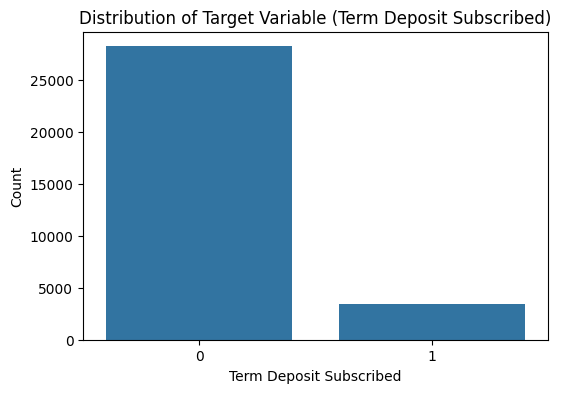

In [ ]:
# Plotting the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='term_deposit_subscribed', data=train_data)
plt.title('Distribution of Target Variable (Term Deposit Subscribed)')
plt.xlabel('Term Deposit Subscribed')
plt.ylabel('Count')
plt.show()

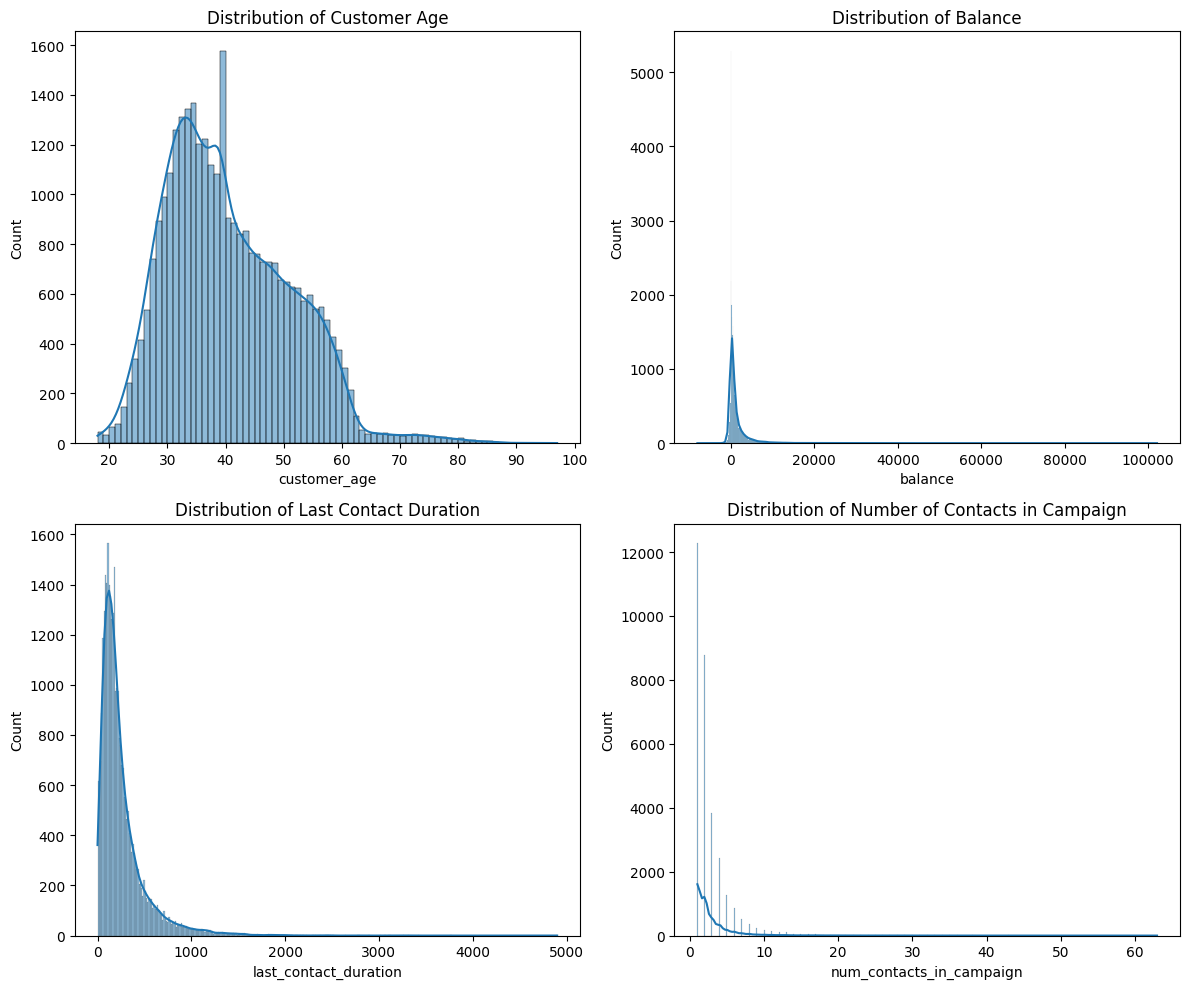

In [ ]:
# Visualizing the distribution of a few key numerical features

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.histplot(train_data['customer_age'], kde=True)
plt.title('Distribution of Customer Age')

plt.subplot(2, 2, 2)
sns.histplot(train_data['balance'], kde=True)
plt.title('Distribution of Balance')


plt.subplot(2, 2, 3)
sns.histplot(train_data['last_contact_duration'], kde=True)
plt.title('Distribution of Last Contact Duration')

plt.subplot(2, 2, 4)
sns.histplot(train_data['num_contacts_in_campaign'], kde=True)
plt.title('Distribution of Number of Contacts in Campaign')

plt.tight_layout()
plt.show()

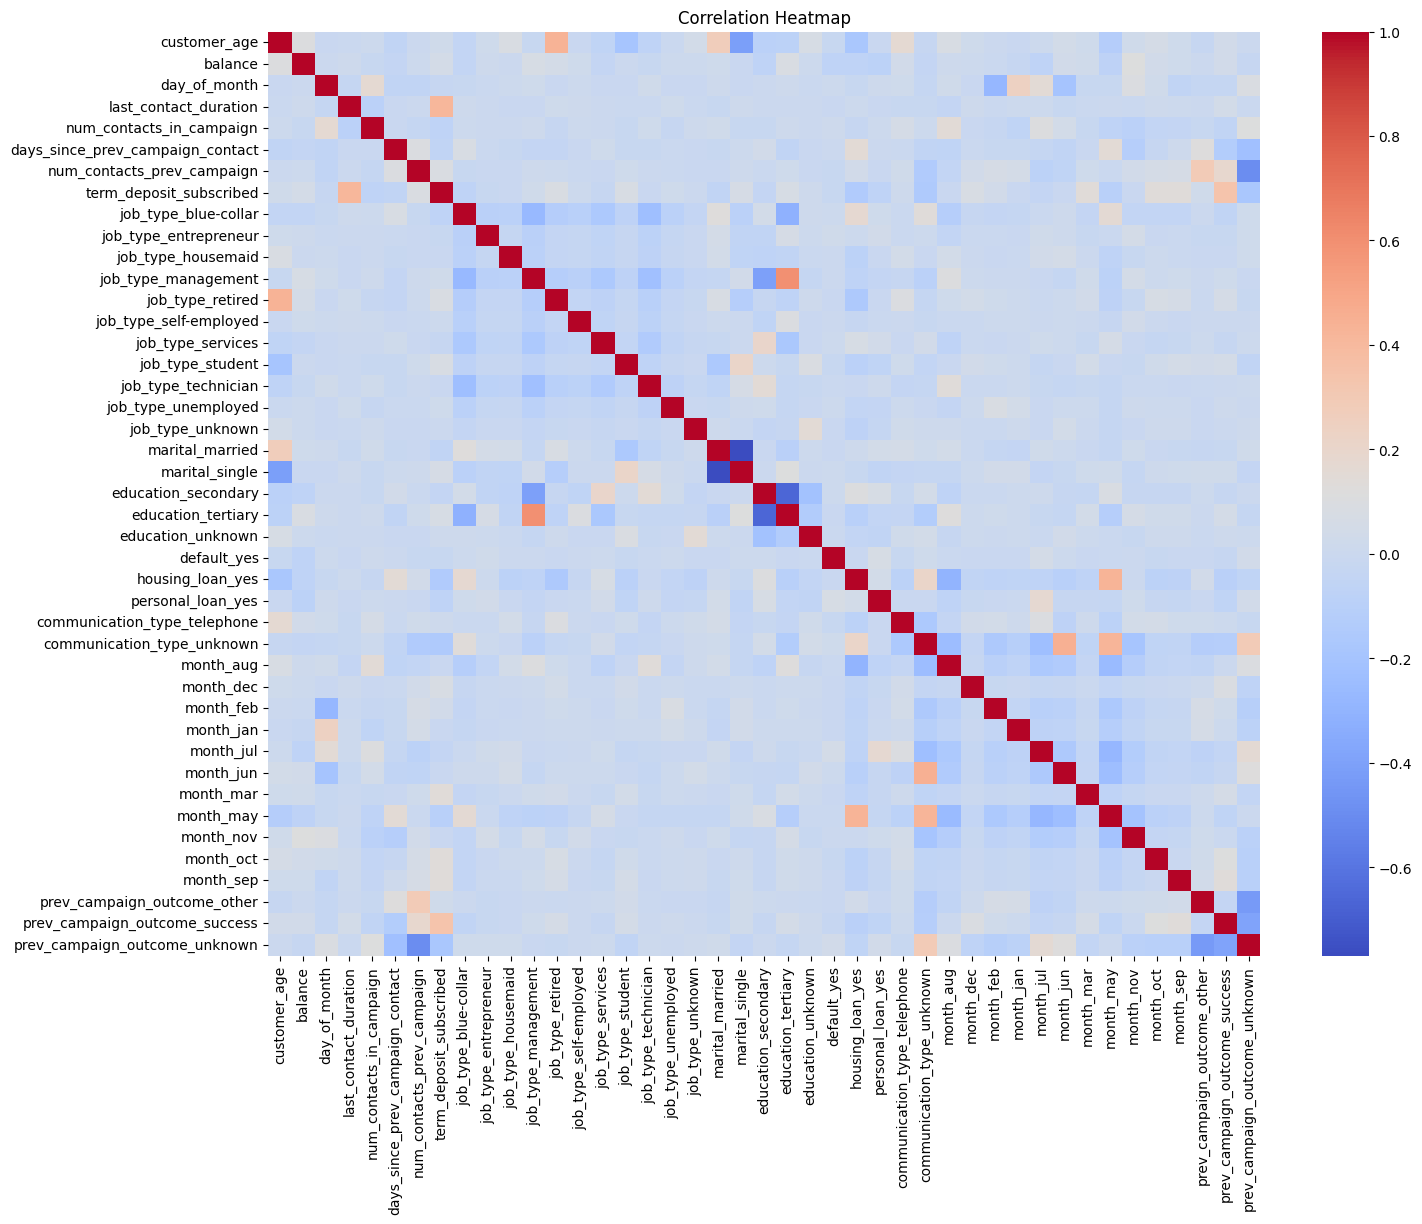

In [ ]:
# Correlation heatmap
plt.figure(figsize=(16, 12))
corr = train_data.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

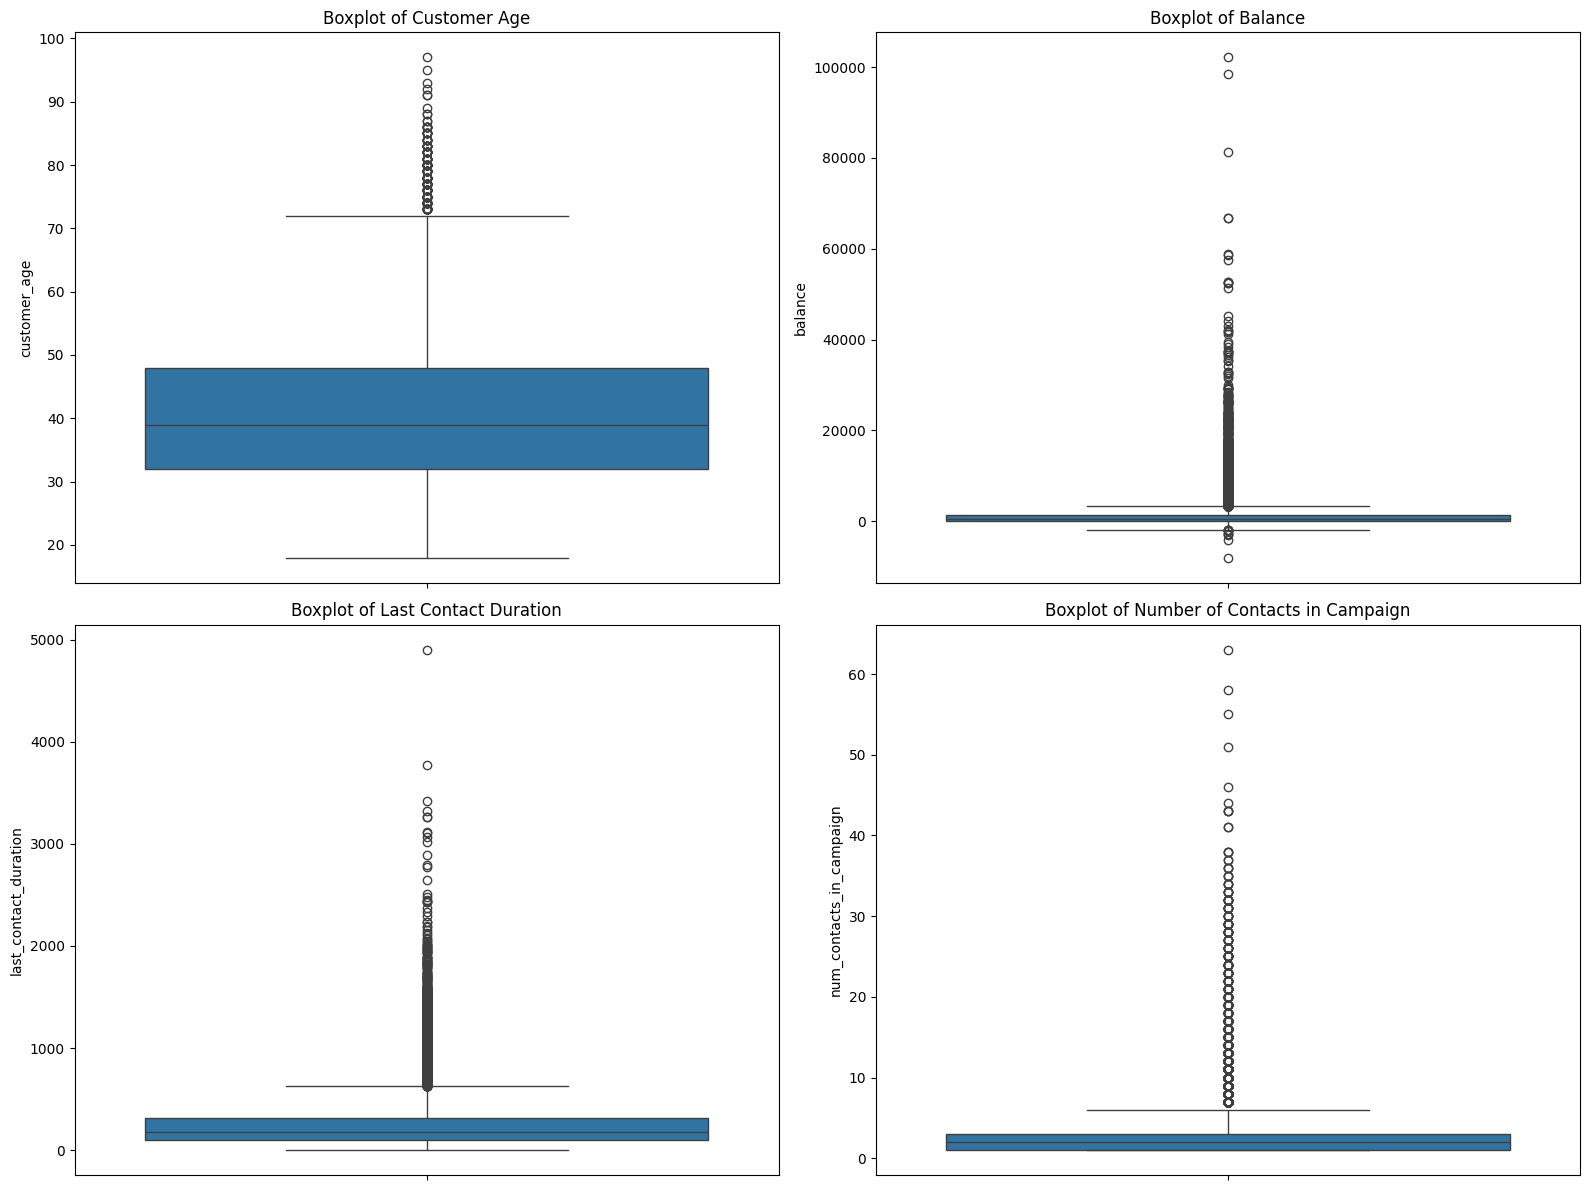

In [ ]:
# Check for outliers in numerical features using box plots
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.boxplot(y=train_data['customer_age'])
plt.title('Boxplot of Customer Age')

plt.subplot(2, 2, 2)
sns.boxplot(y=train_data['balance'])
plt.title('Boxplot of Balance')

plt.subplot(2, 2, 3)
sns.boxplot(y=train_data['last_contact_duration'])
plt.title('Boxplot of Last Contact Duration')

plt.subplot(2, 2, 4)
sns.boxplot(y=train_data['num_contacts_in_campaign'])
plt.title('Boxplot of Number of Contacts in Campaign')

plt.tight_layout()
plt.show()

In [ ]:
# Function to cap outliers in a given series at the 1st and 99th percentiles
def cap_outliers(series):
    lower_limit = series.quantile(0.01)
    upper_limit = series.quantile(0.99)
    return series.clip(lower=lower_limit, upper=upper_limit)

In [ ]:
# Cap outliers in the relevant numerical columns
train_data['customer_age'] = cap_outliers(train_data['customer_age'])
train_data['balance'] = cap_outliers(train_data['balance'])
train_data['last_contact_duration'] = cap_outliers(train_data['last_contact_duration'])
train_data['num_contacts_in_campaign'] = cap_outliers(train_data['num_contacts_in_campaign'])

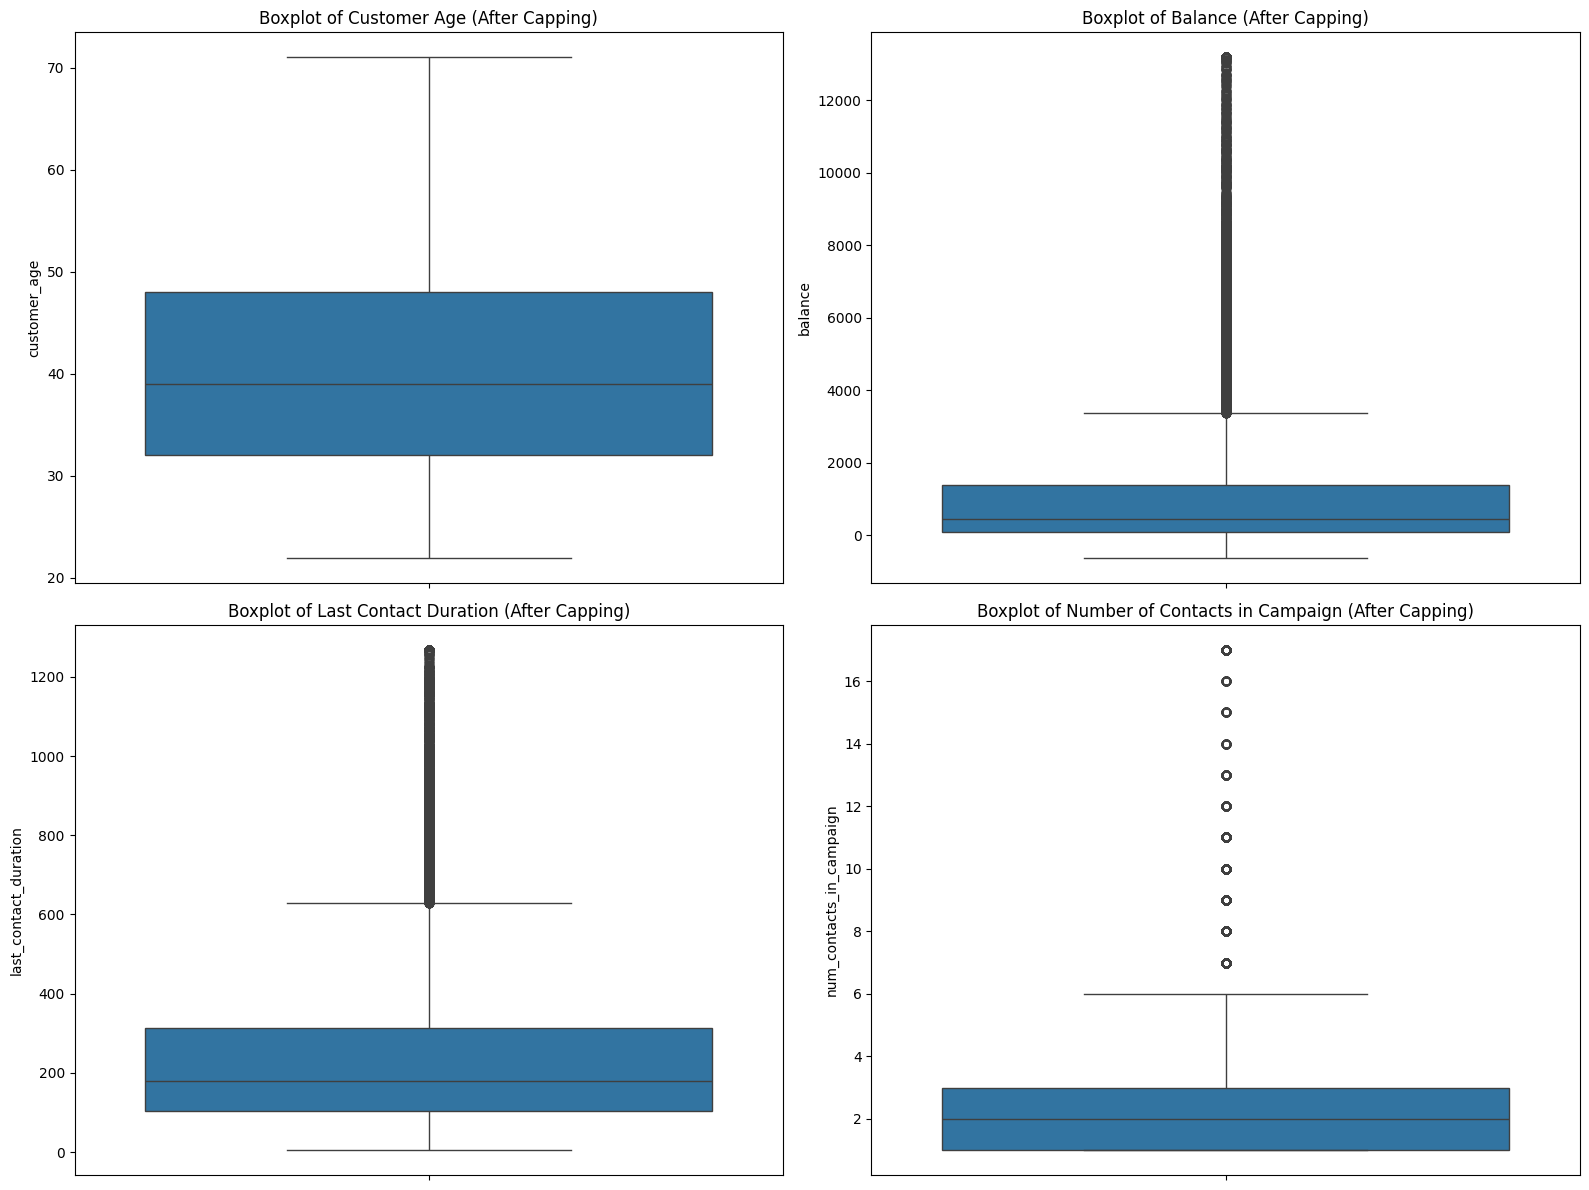

In [ ]:
# Re-plot the boxplots to visualize the effect of outlier handling
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.boxplot(y=train_data['customer_age'])
plt.title('Boxplot of Customer Age (After Capping)')

plt.subplot(2, 2, 2)
sns.boxplot(y=train_data['balance'])
plt.title('Boxplot of Balance (After Capping)')

plt.subplot(2, 2, 3)
sns.boxplot(y=train_data['last_contact_duration'])
plt.title('Boxplot of Last Contact Duration (After Capping)')

plt.subplot(2, 2, 4)
sns.boxplot(y=train_data['num_contacts_in_campaign'])
plt.title('Boxplot of Number of Contacts in Campaign (After Capping)')

plt.tight_layout()
plt.show()

In [ ]:
# Check the summary statistics after capping
print(train_data[['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign']].describe())

       customer_age       balance  last_contact_duration  \
count  31647.000000  31647.000000           31647.000000   
mean      40.368123   1270.077606             251.807070   
std       10.422360   2248.073120             232.926487   
min       22.000000   -621.160000               5.000000   
25%       32.000000     75.000000             103.000000   
50%       39.000000    449.000000             179.000000   
75%       48.000000   1394.000000             313.000000   
max       71.000000  13184.160000            1268.080000   

       num_contacts_in_campaign  
count              31647.000000  
mean                   2.706670  
std                    2.652479  
min                    1.000000  
25%                    1.000000  
50%                    2.000000  
75%                    3.000000  
max                   17.000000  


In [ ]:
# Drop the target column for clustering (since clustering is unsupervised)
X = train_data.drop(['term_deposit_subscribed'], axis=1)

# Select only numerical features for scaling
X_numeric = X.select_dtypes(include=['number'])

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

 K-Means Clustering

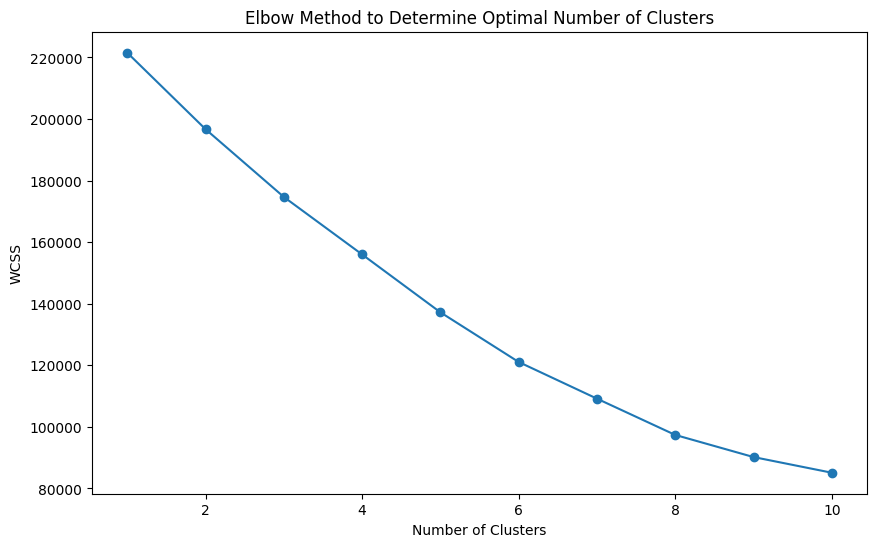

In [ ]:
# Use the Elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia: Sum of squared distances of samples to their closest cluster center

# Plot the elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Applying K-Means

In [ ]:
# Apply K-Means with the optimal number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataset
train_data['Cluster'] = clusters


# Analyze the clusters, focusing on numeric columns only
print(train_data.groupby('Cluster').agg({'customer_age': 'mean', 'balance': 'mean', # Add other numeric columns here
                                        'day_of_month': 'mean', 'last_contact_duration': 'mean',
                                        'num_contacts_in_campaign': 'mean', 'days_since_prev_campaign_contact': 'mean',
                                        'num_contacts_prev_campaign': 'mean'}))

         customer_age      balance  day_of_month  last_contact_duration  \
Cluster                                                                   
0           40.222573   987.591693     21.361174             167.020370   
1           51.447707  2287.979562     15.407837             246.504107   
2           38.067819   971.094592     12.687943             249.355798   
3           34.053081   736.617732     15.757841             266.362046   

         num_contacts_in_campaign  days_since_prev_campaign_contact  \
Cluster                                                               
0                       10.368397                        194.738149   
1                        2.189433                        188.119317   
2                        2.164894                        342.605053   
3                        2.089861                        189.827341   

         num_contacts_prev_campaign  
Cluster                              
0                          0.093454  
1       

Visualizing the Clusters

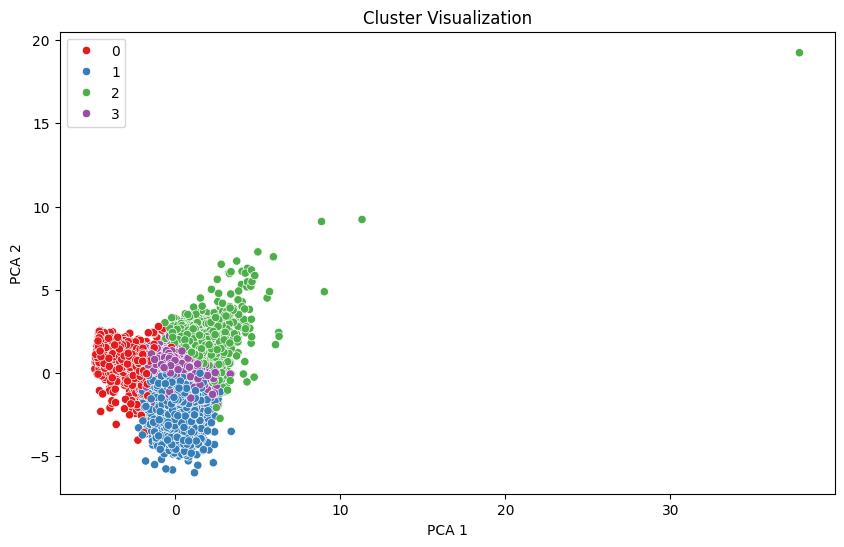

In [ ]:
from sklearn.decomposition import PCA

# Reduce the dimensionality to 2 components for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

# Create a scatter plot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette='Set1')
plt.title('Cluster Visualization')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


**Tuning K-Means with the Elbow Method and Silhouette Score**

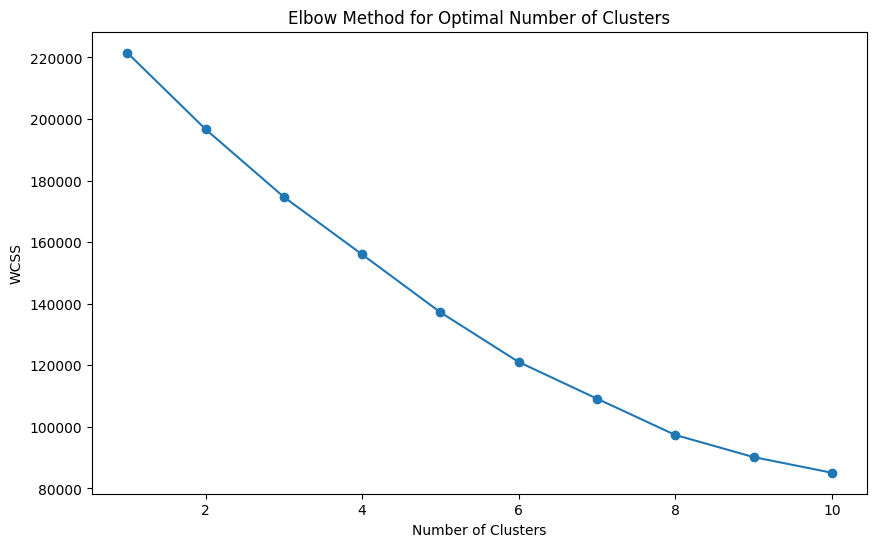

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Finding the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia: Sum of squared distances of samples to their closest cluster center

# Plot the elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Evaluate different K values using silhouette score
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, clusters)
    print(f'Number of clusters: {k}, Silhouette Score: {score}')


Number of clusters: 2, Silhouette Score: 0.14870920686779696
Number of clusters: 3, Silhouette Score: 0.1689775258344944
Number of clusters: 4, Silhouette Score: 0.2000543152269278
Number of clusters: 5, Silhouette Score: 0.20071513207886763
Number of clusters: 6, Silhouette Score: 0.21879042607135812
Number of clusters: 7, Silhouette Score: 0.22153712222155833
Number of clusters: 8, Silhouette Score: 0.2224175910000318
Number of clusters: 9, Silhouette Score: 0.22943726827623698
Number of clusters: 10, Silhouette Score: 0.21302923740357482


In [ ]:
# Apply K-Means with the chosen optimal number of clusters (e.g., 4 from the previous analysis)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataset
train_data['Cluster'] = clusters

# Analyze the clusters
print(train_data.groupby('Cluster').mean(numeric_only=True))


         customer_age      balance  day_of_month  last_contact_duration  \
Cluster                                                                   
0           40.222573   987.591693     21.361174             167.020370   
1           51.447707  2287.979562     15.407837             246.504107   
2           38.067819   971.094592     12.687943             249.355798   
3           34.053081   736.617732     15.757841             266.362046   

         num_contacts_in_campaign  days_since_prev_campaign_contact  \
Cluster                                                               
0                       10.368397                        194.738149   
1                        2.189433                        188.119317   
2                        2.164894                        342.605053   
3                        2.089861                        189.827341   

         num_contacts_prev_campaign  term_deposit_subscribed  \
Cluster                                                   

**Try Different Clustering Algorithms**
DBSCAN (Density-Based Clustering)

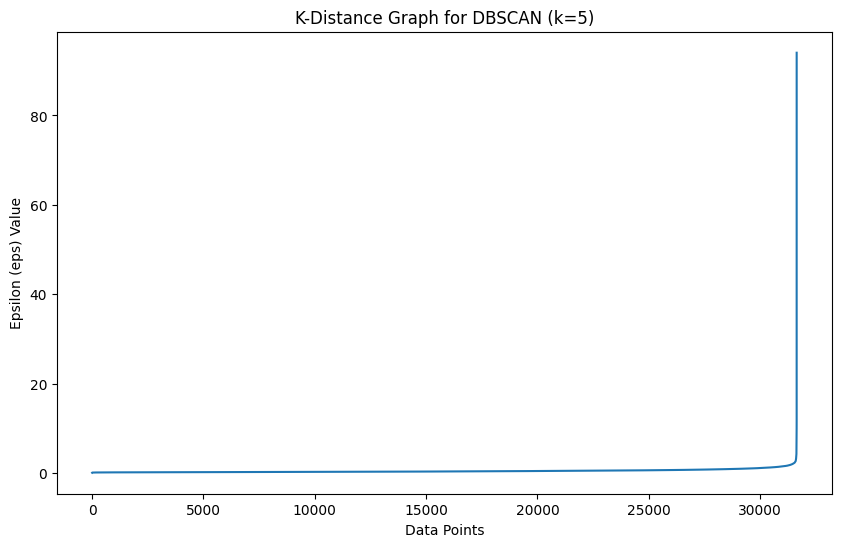

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

# First, find the optimal value of eps using the k-distance plot
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort distances and plot to find the "knee" point
distances = np.sort(distances[:, 4], axis=0)
plt.figure(figsize=(10,6))
plt.plot(distances)
plt.title('K-Distance Graph for DBSCAN (k=5)')
plt.xlabel('Data Points')
plt.ylabel('Epsilon (eps) Value')
plt.show()




In [ ]:
# After determining the optimal epsilon (eps) value from the plot, use DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust these hyperparameters
clusters_dbscan = dbscan.fit_predict(X_scaled)

# Add DBSCAN cluster labels to the dataset
train_data['Cluster_DBSCAN'] = clusters_dbscan

# Analyze the clusters, explicitly selecting numeric columns
print(train_data.groupby('Cluster_DBSCAN').mean(numeric_only=True))

                customer_age       balance  day_of_month  \
Cluster_DBSCAN                                             
-1                 42.087838   2610.443779     15.270660   
 0                 39.881248    756.278154     16.125332   
 1                 48.777778  13098.308889     17.777778   
 2                 36.610390    329.532468      3.766234   
 3                 35.519126    328.063388     13.150273   
...                      ...           ...           ...   
 69                34.000000    367.285714     17.857143   
 70                51.500000    623.500000     12.500000   
 71                40.333333   5225.000000     14.000000   
 72                45.000000   5225.800000     20.000000   
 73                36.500000  13184.160000     21.750000   

                last_contact_duration  num_contacts_in_campaign  \
Cluster_DBSCAN                                                    
-1                         340.915598                  3.275858   
 0                

Hierarchical Clustering

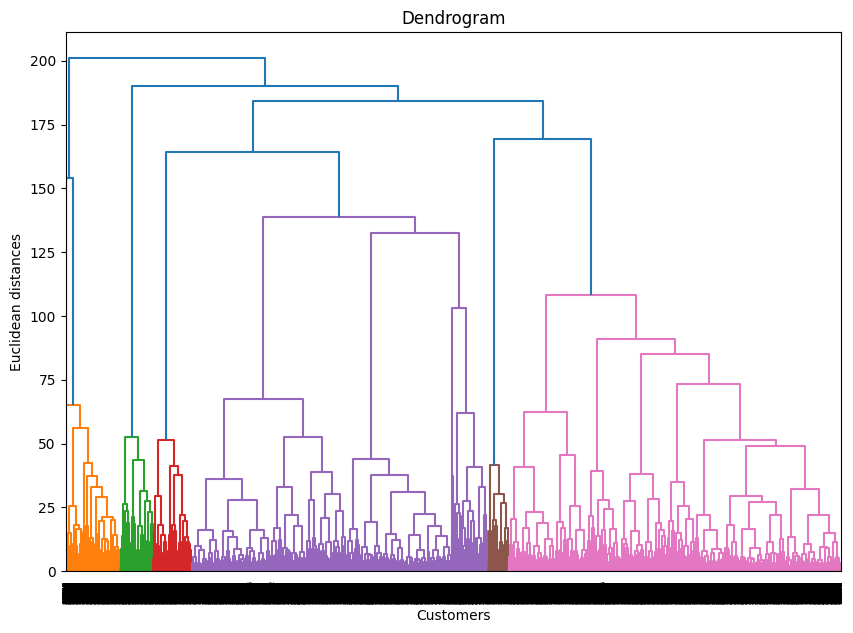

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Dendrogram to help visualize cluster hierarchy and determine optimal number of clusters
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
# After checking the dendrogram, apply Agglomerative Clustering
agglom = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clusters_agglom = agglom.fit_predict(X_scaled)

# Add Agglomerative Clustering labels to the dataset
train_data['Cluster_Agglomerative'] = clusters_agglom

# Analyze the clusters, explicitly selecting numeric columns
print(train_data.groupby('Cluster_Agglomerative').mean(numeric_only=True))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


                       customer_age      balance  day_of_month  \
Cluster_Agglomerative                                            
0                         38.663928   941.215228     21.668245   
1                         42.060922   887.874262     10.303006   
2                         44.546142  9360.657428     15.992436   
3                         38.485613   944.799274     11.996016   

                       last_contact_duration  num_contacts_in_campaign  \
Cluster_Agglomerative                                                    
0                                 221.894507                  3.483914   
1                                 288.263987                  2.030716   
2                                 269.484902                  2.245840   
3                                 210.415228                  2.136786   

                       days_since_prev_campaign_contact  \
Cluster_Agglomerative                                     
0                                       

In [ ]:

train_data['Cluster'] = clusters

# Add the original target variable (term_deposit_subscribed) to the dataset for analysis
train_data['term_deposit_subscribed'] = train_data['term_deposit_subscribed']

y_train = train_data['term_deposit_subscribed'] # y_train is the target variable from the training data


# Analyze the proportion of customers in each cluster who subscribed
cluster_analysis = train_data.groupby('Cluster')['term_deposit_subscribed'].value_counts(normalize=True).unstack()
print(cluster_analysis)

term_deposit_subscribed         0         1
Cluster                                    
0                        0.967043  0.032957
1                        0.881469  0.118531
2                        0.876773  0.123227
3                        0.891956  0.108044


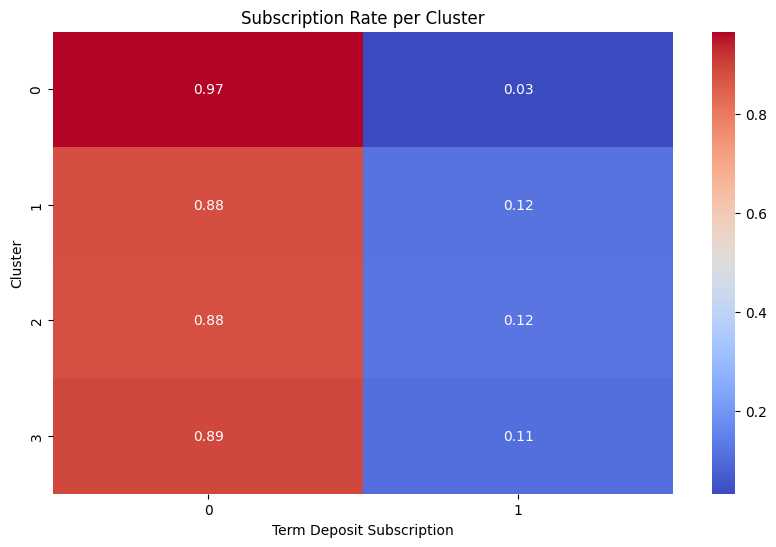

In [ ]:
# Visualize the results (percentage of customers who subscribed in each cluster)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(cluster_analysis, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Subscription Rate per Cluster')
plt.ylabel('Cluster')
plt.xlabel('Term Deposit Subscription')
plt.show()

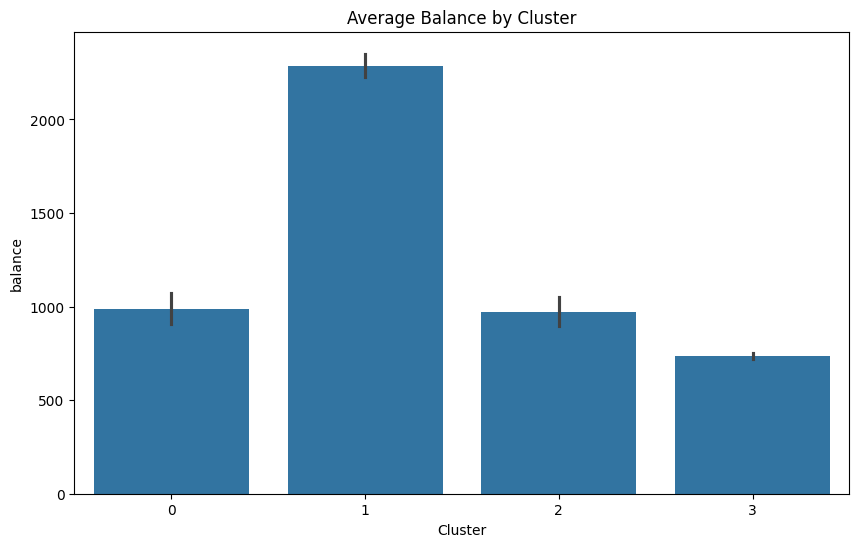

In [ ]:

# Visualize average balance across clusters
plt.figure(figsize=(10,6))
sns.barplot(x='Cluster', y='balance', data=train_data)
plt.title('Average Balance by Cluster')
plt.show()


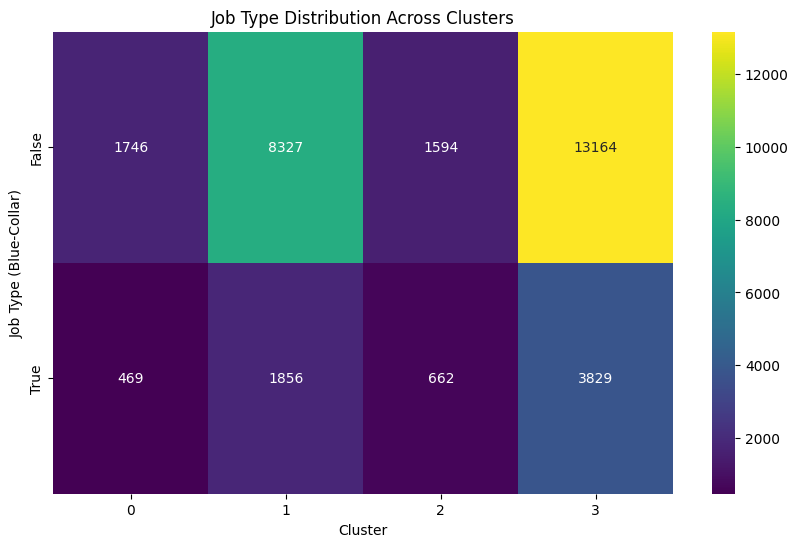

In [ ]:

# Create a cross-tabulation of job_type and Cluster
job_type_cluster_crosstab = pd.crosstab(train_data['job_type_blue-collar'], train_data['Cluster'])

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(job_type_cluster_crosstab, annot=True, fmt='d', cmap='viridis')
plt.title('Job Type Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Job Type (Blue-Collar)')
plt.show()
